# Predicitng heart disease using machine learning

This notebook looks into various python-based machine learning models and data science libraries ina n attempt to build a machine learning model capable of predicting whether someone has heart disease or not based on their medical attributes

We'll use the following steps
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have  heart disease

## 2.Data

The originl data came from the Cleavland data from the UCI machine learning repository
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on kaggle
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3.Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient as heart-disease during the proof of concept,we'll pursue the project.

## 4.Features

This is where you'll get different information about the features used in the project.
 
 **Create data dictionary**


* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import sklearn
sklearn.__version__

'1.3.0'

## Preparing the tools

We're going to use pandas,matplotlib and numpy for data analysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline


# Import models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(fpr,tpr):
    #Plot roc curve given fpr and tpr
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #Plot a line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="black",linestyle='--',label="guessing")
    #Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Reciever operating characteristic (ROC)curve")
    plt.legend()
    plt.show()


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load data

In [3]:
df=pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

## Data exploration(EDA or exploratory data analysis)

The goal here is to find out more about the data and become a subject matter expert on the dataset 

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add,change or remove features to get more out of your data?



In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

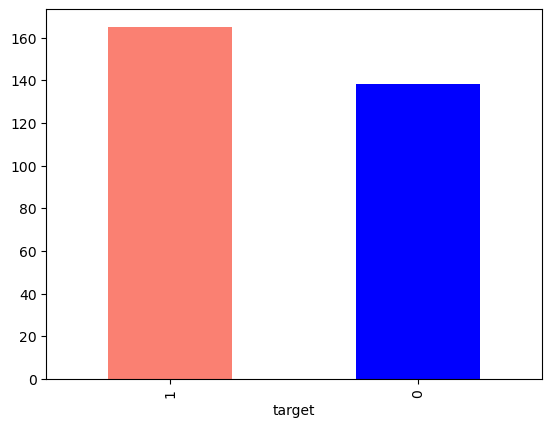

In [7]:
df['target'].value_counts().plot.bar(color=['salmon','blue'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
#Compare target column and sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


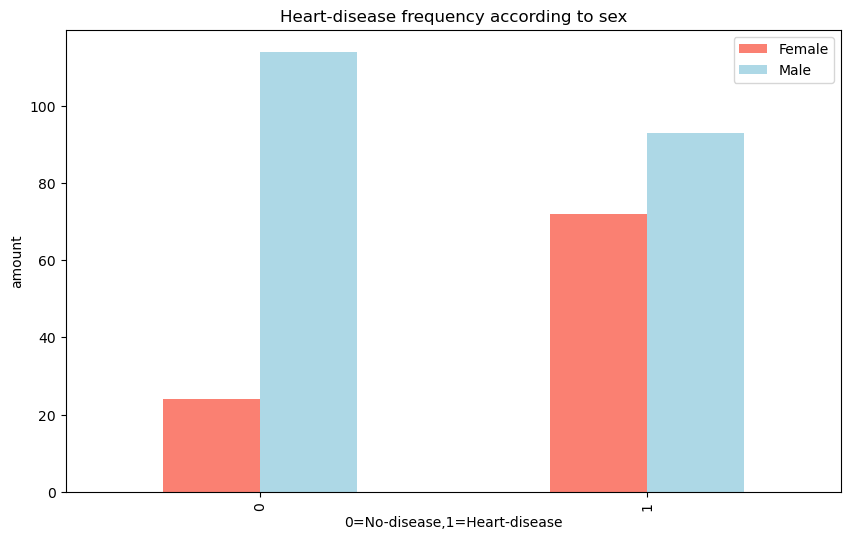

In [13]:
#Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=('salmon','lightblue'))
plt.title("Heart-disease frequency according to sex")
plt.xlabel("0=No-disease,1=Heart-disease")
plt.ylabel("amount")
plt.legend(["Female","Male"]);


### Age vs max.heart rate

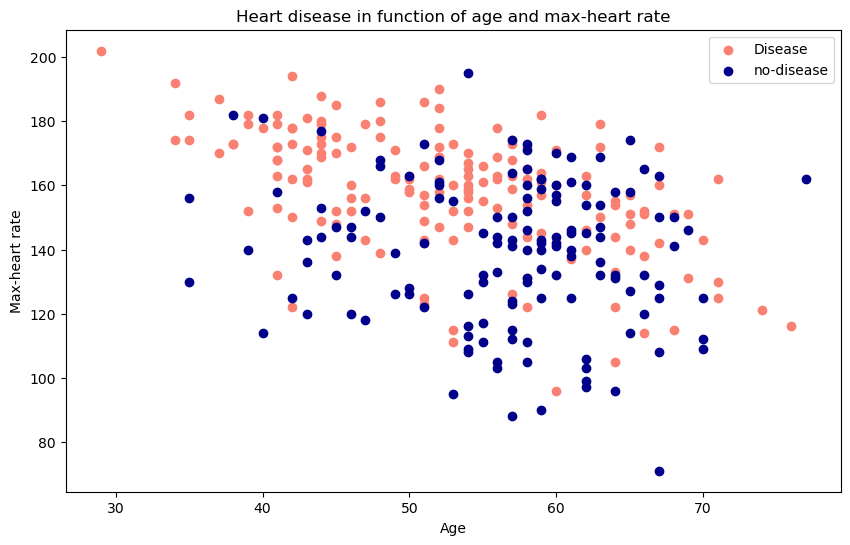

In [14]:
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df["target"]==1],df.thalach[df["target"]==1],c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="darkblue")

plt.title("Heart disease in function of age and max-heart rate")
plt.xlabel("Age")
plt.ylabel("Max-heart rate")
plt.legend(["Disease","no-disease"])

<Axes: ylabel='Frequency'>

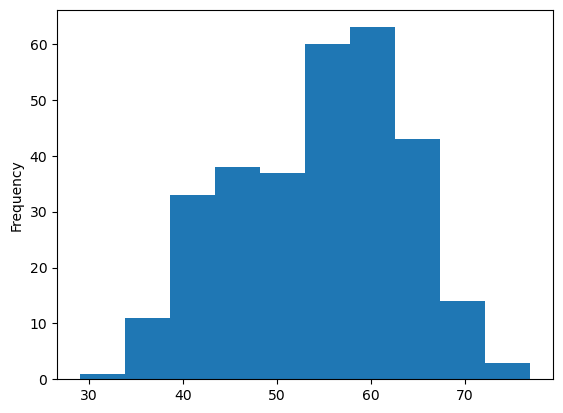

In [15]:
#Check the distribution of the age column with a histogram
df['age'].plot.hist()

### Heart disease frequency per chest pain type
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


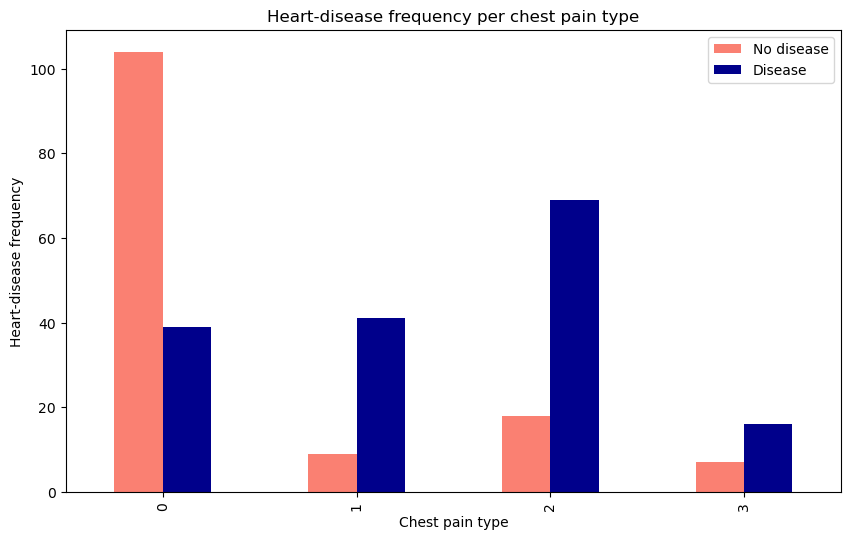

In [17]:
#Make the data more visual
pd.crosstab(df.cp,df.target).plot.bar(figsize=(10,6),color=("salmon","darkblue"))
plt.title("Heart-disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Heart-disease frequency")
plt.legend(["No disease","Disease"])

In [18]:
#Make a correlation matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


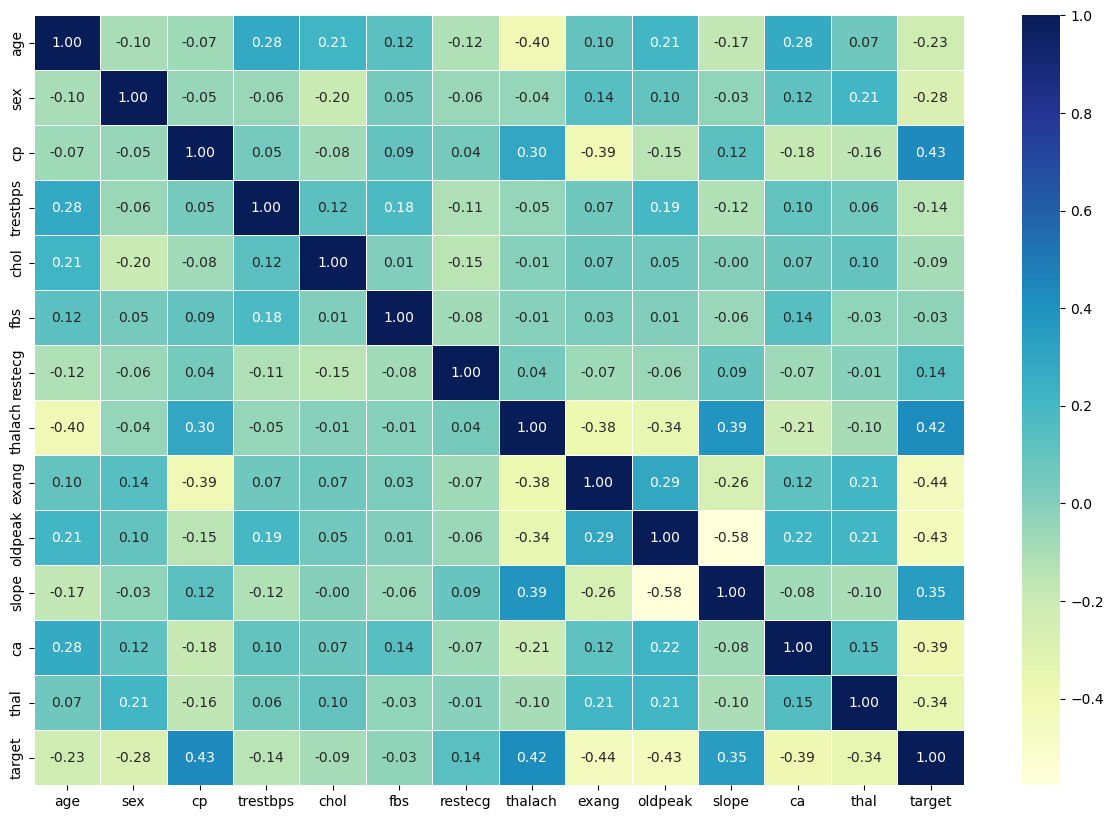

In [19]:
#let's make our correlation matrix prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

In [20]:
X=df.drop("target",axis=1)
y=df["target"]
#Split data into training and test sets
np.random.seed(36)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


We're going to try three different machine learning models
1. Logistic Regression
2. K-neighbours classifier
3. Random Forest Classifier


In [21]:
#Let's consolidate our models inside a dictionary
models={"Logistic_Regression":LogisticRegression(max_iter=10)
        ,"K-neighbours_classifier":KNeighborsClassifier(),
        "Random_Forest":RandomForestClassifier()}

#Create a function to access our models
def fit_evaluate(models,X_train,X_test,y_train,y_test):
    
    "Fits and evaluates given machine learning models"
    #Set random seed
    np.random.seed(42)
    #Create a dictionary for stroing model scores
    scores={}
    #Loop through models
    for name,model in models.items():
        model.fit(X_train,y_train)
        scores[name]=model.score(X_test,y_test)
    return scores    


In [22]:
results=fit_evaluate(models,X_train,X_test,y_train,y_test)
results

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic_Regression': 0.7049180327868853,
 'K-neighbours_classifier': 0.7049180327868853,
 'Random_Forest': 0.819672131147541}

In [23]:
model_compare=pd.DataFrame(results,index=["accuracy"])
model_compare

,Logistic_Regression,K-neighbours_classifier,Random_Forest
accuracy,0.704918,0.704918,0.819672


<Axes: >

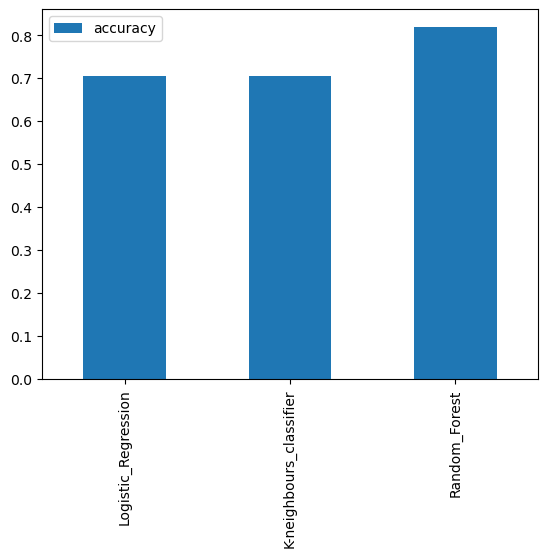

In [24]:
model_compare.T.plot.bar()

Let's look at the following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision 
* Recall
* F1-score
* Classification report
* ROC Curve
* Area under the curve

### Hyperparameter tuning

In [25]:
#Let's tune KNN 
train_scores=[]
test_scores=[]

#Create a list of different values for n neighbours
neighbours=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scoresd list
    test_scores.append(knn.score(X_test,y_test))
    

In [26]:
train_scores

[1.0,
 0.7892561983471075,
 0.78099173553719,
 0.7479338842975206,
 0.7603305785123967,
 0.7355371900826446,
 0.7107438016528925,
 0.7231404958677686,
 0.7272727272727273,
 0.6859504132231405,
 0.7024793388429752,
 0.7024793388429752,
 0.7231404958677686,
 0.6942148760330579,
 0.6818181818181818,
 0.6818181818181818,
 0.6859504132231405,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405]

In [27]:
test_scores

[0.5081967213114754,
 0.5409836065573771,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836]

Maximum KNN score on the test data:72.13%


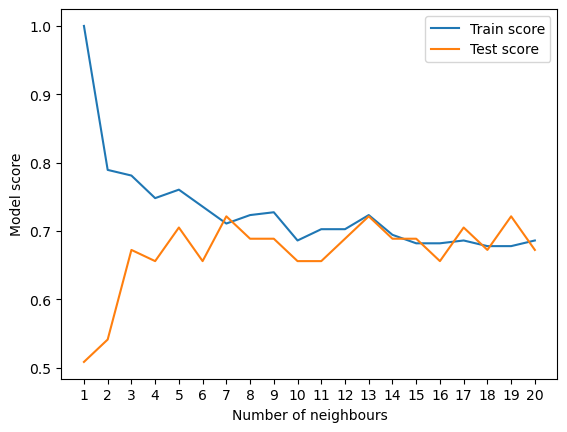

In [28]:
plt.plot(neighbours,train_scores,label='Train score')
plt.plot(neighbours,test_scores,label='Test score')
plt.xlabel("Number of neighbours")
plt.xticks(np.arange(1,21))
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune LogisticRegression and RandomForestClassifier using RandomizedSearchCV

In [29]:
#Create a hyperparameter grid for logisticregression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
         }


In [30]:
#Tune LogisticRegression
np.random.seed(36)

#Setup random hyperparamter for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#Fit random hyperparamter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test,y_test)

0.8360655737704918

We've tuned LogisticRegression,let's do the same for RandomForestClassifier

In [33]:
#Setup random seed
np.random.seed(36)

#Setup random hyperparamter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
#Fit random hyperparamter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_depth': None}

In [35]:
#Evaluate the RandomizedSearch model 
rs_rf.score(X_test,y_test)

0.8524590163934426

In [36]:
results

{'Logistic_Regression': 0.7049180327868853,
 'K-neighbours_classifier': 0.7049180327868853,
 'Random_Forest': 0.819672131147541}

## Hyperparameter tuning using GridSearchCV



In [37]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Setup hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

#Fit hyperparamter gridsearch model
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [39]:
#Evaluate the GridSearch logisticregression model
gs_log_reg.score(X_test,y_test)

0.8524590163934426

In [40]:
results

{'Logistic_Regression': 0.7049180327868853,
 'K-neighbours_classifier': 0.7049180327868853,
 'Random_Forest': 0.819672131147541}

## Evaluating our tuned machine learning classifier,beyond accuracy

* ROC Curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

and it would be great if cross-validation was used wherever possible

To make comparisons and evaluate our trained models,we first need to make predictions.

In [41]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)


In [42]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
y_test

12     1
268    0
132    1
28     1
49     1
      ..
163    1
102    1
301    0
65     1
73     1
Name: target, Length: 61, dtype: int64

In [ ]:
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)   
    

Let's now get a classification report and as well as a cross-validated precision recall,f1-score and accuracy

In [ ]:
print(classification_report(y_test,y_preds))

### Calculate evaluation metrics using cross-validation

We're going to calculate precision,recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score


In [ ]:
#Check best hyperparamters
gs_log_reg.best_params_

In [ ]:
#Create a new classifier with best parameters
clf=LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [ ]:
#Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

In [ ]:
#Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
#Cross-validated recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

In [ ]:
#Cross-validated f1 score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1


In [ ]:
#Visualize cross_validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(legend=False)

### Feature importance

Studying about which features contributed the most to our model

Let's find the feature importance for our logistic regression model

In [ ]:
#Fit an instance of logistic regression
clf=LogisticRegression(C=0.38566204211634725,solver='liblinear')
clf.fit(X_train,y_train)


In [ ]:
clf.coef_

In [ ]:
#Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)

In [ ]:
pd.crosstab(df['sex'],df['target'])

In [ ]:
pd.crosstab(df['slope'],df['target'])

## 6.Experimentation

If evaluation metrics hasn't been reached yet, the following questions arise

* Could you collect more data
* Could you try a better model(Like catboost or XGboost)
* Could you improve our current models(beyond what we've done so far)

* If your model is good enough(you have hit your evauation metric),how can you export it and share it with others?
